In [4]:
import pandas as pd
import numpy as np
from datasets import load_dataset

class DataLoader:
    """Classe per il caricamento e l'analisi preliminare dei dati"""
    
    def __init__(self, dataset_name='maharshipandya/spotify-tracks-dataset'):
        self.dataset_name = dataset_name
        self.data = None
    
    def load_data(self):
        """Carica il dataset da HuggingFace"""
        print(f"Caricamento dataset da HuggingFace: {self.dataset_name}")
        dataset = load_dataset(self.dataset_name)
        self.data = pd.DataFrame(dataset['train'])
        print(f"✓ Dataset caricato correttamente")
        self._show_info()
        return self.data
    
    def _show_info(self):
        """Mostra informazioni sul dataset"""
        print(f"\nInfo dataset:")
        print(f"  - Righe: {self.data.shape[0]}")
        print(f"  - Colonne: {self.data.shape[1]}")
        print(f"  - Valori mancanti: {self.data.isnull().sum().sum()}")
        
        if 'popularity' in self.data.columns:
            print(f"\nDistribuzione target (popularity):")
            print(f"  - Media: {self.data['popularity'].mean():.2f}")
            print(f"  - Mediana: {self.data['popularity'].median():.2f}")
            print(f"  - Min: {self.data['popularity'].min()}")
            print(f"  - Max: {self.data['popularity'].max()}")
    
    def get_feature_columns(self):
        """Restituisce le colonne numeriche utilizzabili come features"""
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns.tolist()
        exclude_cols = ['Unnamed: 0', 'popularity']
        features = [col for col in numeric_cols if col not in exclude_cols]
        return features

In [5]:
from src.data_loader import DataLoader
loader = DataLoader()
df = loader.load_data()


Caricamento dataset da HuggingFace: maharshipandya/spotify-tracks-dataset
✓ Dataset caricato correttamente

Info dataset:
  - Righe: 114000
  - Colonne: 21
  - Valori mancanti: 3

Distribuzione target (popularity):
  - Media: 33.24
  - Mediana: 35.00
  - Min: 0
  - Max: 100


In [6]:
# Prendo le feature numeriche utili
features = loader.get_feature_columns() + ['popularity']

# Calcolo matrice di correlazione
corr_matrix = df[features].corr(method='pearson')

print("📊 Matrice di correlazione:\n")
display(corr_matrix)

print("\n📈 Correlazione delle feature con 'popularity':\n")
display(corr_matrix['popularity'].sort_values(ascending=False))


📊 Matrice di correlazione:



,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
duration_ms,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225,-0.007101
danceability,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,0.035448
energy,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,0.001056
key,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,-0.003853
loudness,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992,0.050423
mode,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092,-0.013931
speechiness,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011,-0.044927
acousticness,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138,-0.025472
instrumentalness,0.124371,-0.185606,-0.181879,-0.006823,-0.433477,-0.049955,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.082580,-0.095139
liveness,0.010321,-0.131617,0.184796,-0.001600,0.076899,0.014012,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600,-0.023651,-0.005387



📈 Correlazione delle feature con 'popularity':



popularity          1.000000
loudness            0.050423
danceability        0.035448
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64

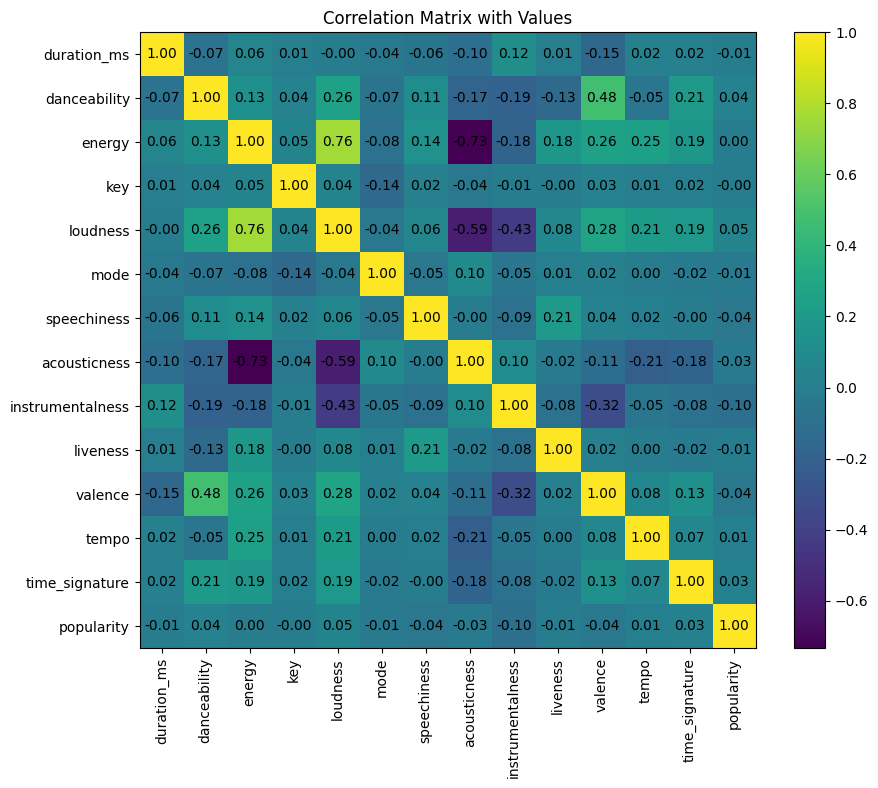

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Costruisco la matrice di correlazione
features = loader.get_feature_columns() + ['popularity']
corr = df[features].corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap base (senza scegliere colori esplicitamente)
cax = ax.imshow(corr, interpolation='nearest')

# Posizioni ticks
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features, rotation=90)
ax.set_yticklabels(features)

# Scrive i valori numerici nella heatmap
for i in range(len(features)):
    for j in range(len(features)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center")

ax.set_title("Correlation Matrix with Values")
fig.colorbar(cax)
plt.show()
